In [64]:
import pandas as pd
import numpy as np

camp = pd.read_csv('D:/SMU/Data Analytics/Datasets/marketing_campaign.csv', sep = ';')
camp.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [65]:
camp.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [66]:
camp.dropna(inplace=True)

In [67]:
camp.shape

(2216, 29)

In [68]:
table_marital = pd.crosstab(camp['Marital_Status'],camp['AcceptedCmp1'],margins=False)
table_marital

AcceptedCmp1,0,1
Marital_Status,,
Absurd,1,1
Alone,3,0
Divorced,220,12
Married,795,62
Single,441,30
Together,541,32
Widow,71,5
YOLO,2,0


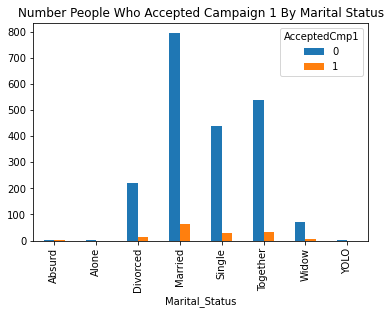

In [93]:
table_marital.plot(kind='bar')
plt.title('Number People Who Accepted Campaign 1 By Marital Status')
plt.show()

In [69]:
#test if marital status affect the acceptance of campaign 1
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_marital)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=8.899, p=0.260
Probably independent


In [70]:
table_complain = pd.crosstab(camp['AcceptedCmp1'],camp['Complain'],margins=False)
table_complain

Complain,0,1
AcceptedCmp1,,
0,2053,21
1,142,0


In [71]:
#test if the acceptance of marketing campaign 1 affects the probability of customer complaints
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_complain)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.573, p=0.449
Probably independent


In [72]:
#test if there was a significant decrease in number of complaints for customers exposed to marketing campaign 1
data1 = camp['AcceptedCmp1']
data2 = camp['Complain']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=9.673, p=0.000
Probably different distributions


In [87]:
camp['Complain'].replace(0,'No',inplace=True)
camp['Complain'].replace(1,'Yes',inplace=True)

table_complain = pd.crosstab(camp['Complain'],camp['AcceptedCmp1'],margins=False)
table_complain

AcceptedCmp1,0,1
Complain,,
No,2053,142
Yes,21,0


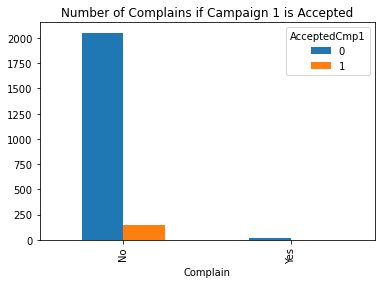

In [91]:
table_complain.plot(kind='bar')
plt.title('Number of Complains if Campaign 1 is Accepted')
plt.show()

In [100]:
camp['NumWebPurchasesSum'] = camp['NumWebPurchases'].sum()
camp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumWebPurchasesSum
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,No,3,11,1,9053
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,No,3,11,0,9053
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,No,3,11,0,9053
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,No,3,11,0,9053
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,No,3,11,0,9053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,No,3,11,0,9053
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,No,3,11,0,9053
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,No,3,11,0,9053
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,No,3,11,0,9053


<AxesSubplot:>

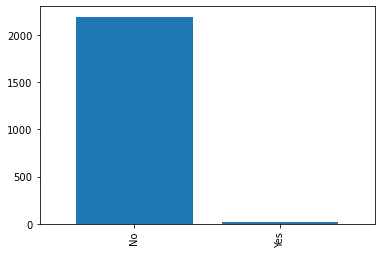

In [79]:
camp['Complain'].value_counts().plot(kind='bar',width=0.8)

In [104]:
camp['AcceptedCmp1'].replace(0,'No',inplace=True)
camp['AcceptedCmp1'].replace(1,'Yes',inplace=True)

table_accept1 = pd.crosstab(camp['AcceptedCmp1'],camp['NumWebPurchasesSum'],margins=False)
table_accept1

NumWebPurchasesSum,9053
AcceptedCmp1,
No,2074
Yes,142


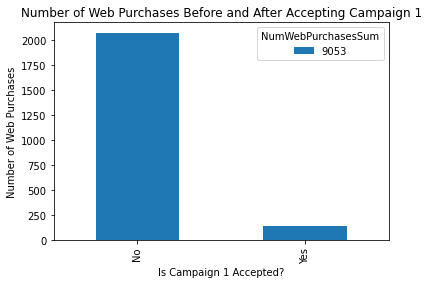

In [105]:
table_accept1.plot(kind='bar')
plt.title('Number of Web Purchases Before and After Accepting Campaign 1')
plt.xlabel('Is Campaign 1 Accepted?')
plt.ylabel('Number of Web Purchases')
plt.show()

In [30]:
#test if exposure to marketing campaign 1 affects number of web purchases
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_accept1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=102.193, p=0.000
Probably dependent


In [31]:
#test number of web purchases increased significantly after exposure to marketing campaign 1
from scipy.stats import ttest_rel
data1 = camp['AcceptedCmp1']
data2 = camp['NumWebPurchases']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-69.781, p=0.000
Probably different distributions


In [108]:
camp['AcceptedCmp2'].replace(0,'No',inplace=True)
camp['AcceptedCmp2'].replace(1,'Yes',inplace=True)

table_accept2 = pd.crosstab(camp['AcceptedCmp2'],camp['NumWebPurchasesSum'],margins=False)
table_accept2

NumWebPurchasesSum,9053
AcceptedCmp2,
No,2186
Yes,30


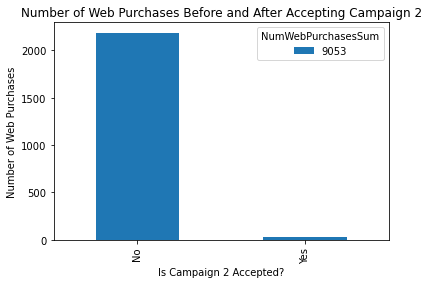

In [109]:
table_accept2.plot(kind='bar')
plt.title('Number of Web Purchases Before and After Accepting Campaign 2')
plt.xlabel('Is Campaign 2 Accepted?')
plt.ylabel('Number of Web Purchases')
plt.show()

In [34]:
#test if exposure to marketing campaign 2 affects number of web purchases
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_accept2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=17.607, p=0.225
Probably independent


In [35]:
#test number of web purchases increased significantly after exposure to marketing campaign 2
from scipy.stats import ttest_rel
data1 = camp['AcceptedCmp2']
data2 = camp['NumWebPurchases']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-69.971, p=0.000
Probably different distributions


In [110]:
camp['AcceptedCmp3'].replace(0,'No',inplace=True)
camp['AcceptedCmp3'].replace(1,'Yes',inplace=True)

table_accept3 = pd.crosstab(camp['AcceptedCmp3'],camp['NumWebPurchasesSum'],margins=False)
table_accept3

NumWebPurchasesSum,9053
AcceptedCmp3,
No,2053
Yes,163


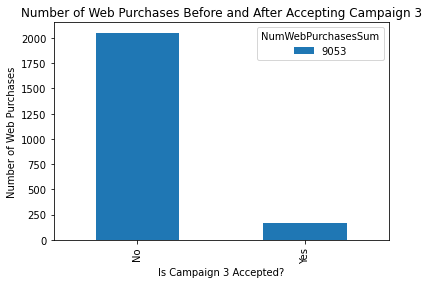

In [111]:
table_accept3.plot(kind='bar')
plt.title('Number of Web Purchases Before and After Accepting Campaign 3')
plt.xlabel('Is Campaign 3 Accepted?')
plt.ylabel('Number of Web Purchases')
plt.show()

In [37]:
#test if exposure to marketing campaign 3 affects number of web purchases
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_accept3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=48.368, p=0.000
Probably dependent


In [38]:
#test number of web purchases increased significantly after exposure to marketing campaign 3
from scipy.stats import ttest_rel
data1 = camp['AcceptedCmp3']
data2 = camp['NumWebPurchases']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-68.869, p=0.000
Probably different distributions


In [112]:
camp['AcceptedCmp4'].replace(0,'No',inplace=True)
camp['AcceptedCmp4'].replace(1,'Yes',inplace=True)

table_accept4 = pd.crosstab(camp['AcceptedCmp4'],camp['NumWebPurchasesSum'],margins=False)
table_accept4

NumWebPurchasesSum,9053
AcceptedCmp4,
No,2052
Yes,164


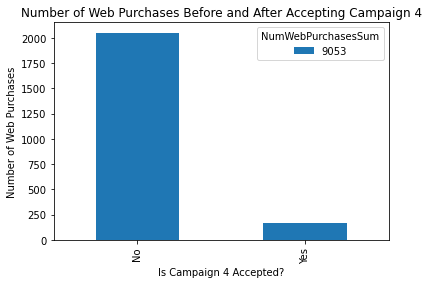

In [113]:
table_accept4.plot(kind='bar')
plt.title('Number of Web Purchases Before and After Accepting Campaign 4')
plt.xlabel('Is Campaign 4 Accepted?')
plt.ylabel('Number of Web Purchases')
plt.show()

In [40]:
#test if exposure to marketing campaign 4 affects number of web purchases
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_accept4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=86.815, p=0.000
Probably dependent


In [41]:
#test number of web purchases increased significantly after exposure to marketing campaign 4
from scipy.stats import ttest_rel
data1 = camp['AcceptedCmp4']
data2 = camp['NumWebPurchases']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-69.662, p=0.000
Probably different distributions


In [114]:
camp['AcceptedCmp5'].replace(0,'No',inplace=True)
camp['AcceptedCmp5'].replace(1,'Yes',inplace=True)

table_accept5 = pd.crosstab(camp['AcceptedCmp5'],camp['NumWebPurchasesSum'],margins=False)
table_accept5

NumWebPurchasesSum,9053
AcceptedCmp5,
No,2054
Yes,162


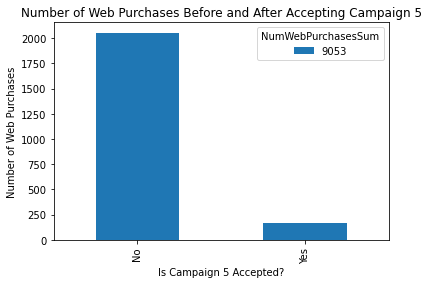

In [115]:
table_accept5.plot(kind='bar')
plt.title('Number of Web Purchases Before and After Accepting Campaign 5')
plt.xlabel('Is Campaign 5 Accepted?')
plt.ylabel('Number of Web Purchases')
plt.show()

In [43]:
#test if exposure to marketing campaign 5 affects number of web purchases
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(table_accept5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=106.641, p=0.000
Probably dependent


In [46]:
#test number of web purchases increased significantly after exposure to marketing campaign 5
from scipy.stats import ttest_rel
data1 = camp['AcceptedCmp5']
data2 = camp['NumWebPurchases']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-69.529, p=0.000
Probably different distributions
